In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from ipywidgets import interact
from sklearn.linear_model import BayesianRidge

##**$Miniproyecto$ $2$ $-$ $Tratamiento$ $de$ $señales$ $3$**

Manuel José Bothert Martínez, Yeison Monsalve Sanchez, Juan Manuel Marín Gallego, Alejandro Estrada Moscoso

In [ ]:
data = pd.read_csv('Dataframe_Miniproyecto_1.csv') # Cargamos el dataframe.
data[20:26]

,Pot(SSA1),F_Pmax(SSA1),Energia(SSA1),Media(SSA1),Var(SSA1),Max(SSA1),Min(SSA1),Pot(SSA2),F_Pmax(SSA2),Energia(SSA2),Media(SSA2),Var(SSA2),Max(SSA2),Min(SSA2),Pot(SSA3),F_Pmax(SSA3),Energia(SSA3),Media(SSA3),Var(SSA3),Max(SSA3),Min(SSA3),Pot(SSA4),F_Pmax(SSA4),Energia(SSA4),Media(SSA4),Var(SSA4),Max(SSA4),Min(SSA4),Pot(SSA5),F_Pmax(SSA5),Energia(SSA5),Media(SSA5),Var(SSA5),Max(SSA5),Min(SSA5),Tipo
20,0.035135,1.367188,11.001499,0.003284,0.000032,0.035135,0.000853,0.003019,12.500000,0.552222,0.001389,7.253244e-07,0.003019,0.000551,0.001652,21.484375,0.134158,0.000553,2.636978e-07,0.001652,0.000040,0.001226,33.007812,0.084436,0.000422,1.697307e-07,0.001226,0.000015,0.002252,49.218750,0.115062,0.000379,2.586398e-07,0.002252,0.000004,Tele
21,0.029894,1.367188,4.606804,0.002967,0.000021,0.029894,0.000829,0.007911,23.632812,0.936704,0.000954,1.189736e-06,0.007911,0.000205,0.006765,23.632812,0.729775,0.000880,6.813874e-07,0.006765,0.000009,0.016724,49.414062,0.898656,0.001075,3.858378e-06,0.016724,0.000002,0.005118,36.132812,0.422817,0.001137,6.239358e-07,0.005118,0.000426,Loc
22,0.034312,1.367188,5.915285,0.003285,0.000030,0.034312,0.000892,0.003664,39.257812,0.585503,0.001027,5.236090e-07,0.003664,0.000395,0.004341,49.414062,0.357888,0.000757,5.939477e-07,0.004341,0.000010,0.003606,16.406250,0.349304,0.001000,5.822095e-07,0.003606,0.000177,0.005411,49.414062,0.263703,0.000745,5.959332e-07,0.005411,0.000022,Loc
23,0.041829,49.218750,4.208005,0.002187,0.000024,0.041829,0.000035,0.019187,1.367188,1.921571,0.001928,9.163823e-06,0.019187,0.000308,0.009791,37.109375,0.923061,0.001577,3.721770e-06,0.009791,0.000115,0.005253,25.976562,0.418438,0.001253,1.696167e-06,0.005253,0.000030,0.007639,13.671875,0.423201,0.001322,2.373468e-06,0.007639,0.000154,Loc
24,0.041829,49.218750,4.208005,0.002187,0.000024,0.041829,0.000035,0.019187,1.367188,1.921571,0.001928,9.163823e-06,0.019187,0.000308,0.009791,37.109375,0.923061,0.001577,3.721770e-06,0.009791,0.000115,0.005253,25.976562,0.418438,0.001253,1.696167e-06,0.005253,0.000030,0.007639,13.671875,0.423201,0.001322,2.373468e-06,0.007639,0.000154,Loc
25,0.033841,1.367188,5.774650,0.003245,0.000029,0.033841,0.000847,0.004781,49.023438,0.267329,0.001137,3.418100e-07,0.004781,0.000107,0.007078,49.023438,0.305427,0.000933,7.856088e-07,0.007078,0.000260,0.003486,35.937500,0.149797,0.000642,3.261934e-07,0.003486,0.000010,0.002687,29.101562,0.140041,0.000618,3.524628e-07,0.002687,0.000007,Loc


In [ ]:
dataSismo = np.asarray(data.drop('Tipo',1))

Tags = ["" for x in range(63)]
for i in range(0,21,1):
  Tags[i] = 0
for j in range(21,42,1):
  Tags[j] = 1
for l in range(42,63,1):
  Tags[l] = 2

In [ ]:
pca = PCA(n_components = 35)  # project from 64 to 2 dimensions
projectedZ = pca.fit_transform(dataSismo) # Entrenamos el modelo PCA (Calculamos los parámetros de proyección W, autovals, autovecs)
BasisW = pca.components_
print("Dataframe size: ", data.shape)
print("Z Projection size: ", projectedZ.shape)
print("PCA explained variance: ", pca.explained_variance_)
print("W Projection size: ", BasisW.shape)

Dataframe size:  (63, 36)
Z Projection size:  (63, 35)
PCA explained variance:  [6.53777632e+02 4.85272696e+02 2.68812864e+02 1.61791766e+02
 8.23025263e+01 4.70666973e+01 1.99137523e+01 1.56547842e+00
 7.11385250e-02 4.94515873e-02 4.33659936e-05 1.96429931e-05
 1.09655388e-05 3.73777252e-06 1.44879301e-06 4.47993757e-08
 3.27131679e-08 1.83689989e-08 1.49092002e-08 7.81468676e-09
 2.81256345e-09 2.17638349e-09 8.56512189e-10 4.88184443e-10
 3.29702931e-10 5.72923405e-12 2.69879454e-13 1.17822922e-13
 4.65010642e-14 2.02280611e-15 2.83119639e-30 2.83119639e-30
 2.83119639e-30 2.83119639e-30 2.62999461e-31]
W Projection size:  (35, 35)


(35,) 
 Explained variance 0.9999298688191215


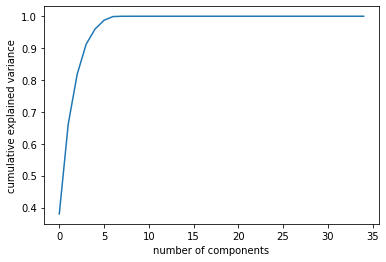

In [ ]:
varExp = pca.explained_variance_ratio_
print(varExp.shape,'\n Explained variance',np.sum(varExp[:8]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

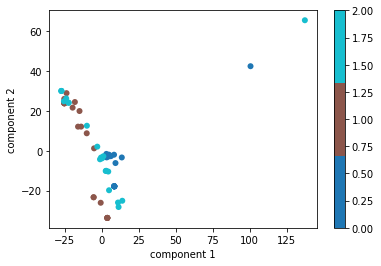

In [ ]:
plt.scatter(projectedZ[:, 0], projectedZ[:, 1], c=Tags, edgecolor='none', cmap=plt.cm.get_cmap('tab10', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
def projectedZ_Components(n,data,):
  pca = PCA(n_components = n)
  projectedZ = pca.fit_transform(data)
  BasisW = pca.components_
  print("Dataframe size: ", data.shape)
  print("Z Projection size: ", projectedZ.shape)
  print("PCA explained variance: ", pca.explained_variance_)
  print("W Projection size: ", BasisW.shape)
  return projectedZ

Dataframe size:  (63, 35)
Z Projection size:  (63, 2)
PCA explained variance:  [653.77763169 485.27269569]
W Projection size:  (2, 35)


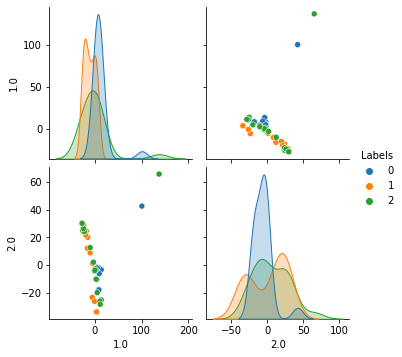

In [ ]:
n = 2
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Tele --> 0
Local --> 1
Reg --> 2

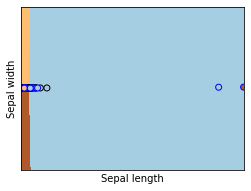

Acuracy Train:  0.7659574468085106
Acuracy Test:  0.875


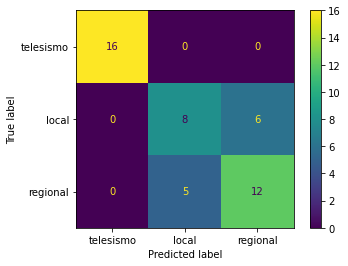

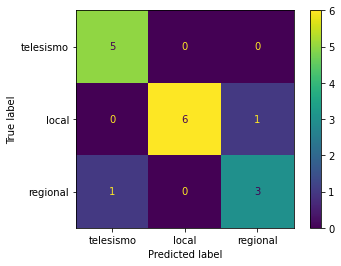

In [ ]:
from sklearn.utils.validation import check_random_state
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

# importemos algunos datos
X = dataSismo[:, 2:4]  # Tomemos como ejemplo las primeras dos dimensiones.
Y = Tags

# Dividimos el conjunto de datos en Entrenamiento y Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 123)


# Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Graficamos la superficie de decisión. Para ellos, asignaremos a cada color
# un punto en la malla [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # tamaño del paso en la malla
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Se grafican los resultados en regioes de colores
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Se grafican también los datos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='b', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


# Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Acc_train = accuracy_score(y_train, logreg.predict(X_train))
cMat_train = confusion_matrix(y_train, logreg.predict(X_train))

Acc_test = accuracy_score(y_test, logreg.predict(X_test))
cMat_test = confusion_matrix(y_test, logreg.predict(X_test))


print('Acuracy Train: ',Acc_train)
print('Acuracy Test: ',Acc_test)

ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['telesismo','local','regional'])
ax1.plot()
plt.show()


ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['telesismo','local','regional'])
ax2.plot()
plt.show()

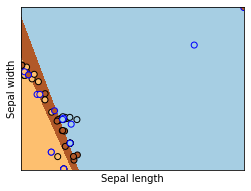

Acuracy Train:  0.723404255319149
Acuracy Test:  0.75


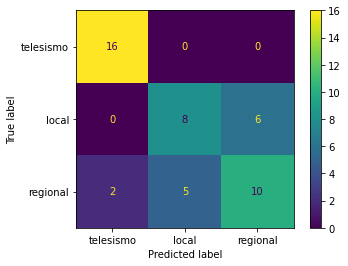

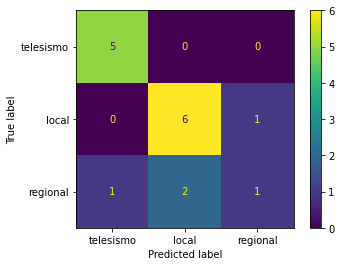

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# importemos algunos datos
iris = data

modelPCA = PCA(n_components=2)
X = dataSismo 

X_PCA = modelPCA.fit_transform(X)
Y = Tags

# Dividimos el conjunto de datos en Entrenamiento y Test
X_train, X_test, y_train, y_test = train_test_split(X_PCA, Y, random_state = 123)


# Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Graficamos la superficie de decisión. Para ellos, asignaremos a cada color
# un punto en la malla [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_PCA[:, 0].min() - .5, X_PCA[:, 0].max() + .5
y_min, y_max = X_PCA[:, 1].min() - .5, X_PCA[:, 1].max() + .5
h = .02  # tamaño del paso en la malla
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Se grafican los resultados en regioes de colores
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Se grafican también los datos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='b', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


# Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Acc_train = accuracy_score(y_train, logreg.predict(X_train))
cMat_train = confusion_matrix(y_train, logreg.predict(X_train))

Acc_test = accuracy_score(y_test, logreg.predict(X_test))
cMat_test = confusion_matrix(y_test, logreg.predict(X_test))


print('Acuracy Train: ',Acc_train)
print('Acuracy Test: ',Acc_test)

ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['telesismo','local','regional'])
ax1.plot()
plt.show()


ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['telesismo','local','regional'])
ax2.plot()
plt.show()

[[0.60512737 0.24383359 0.15103904]
 [0.60512737 0.24383359 0.15103904]
 [0.60512737 0.24383359 0.15103904]
 [0.60512737 0.24383359 0.15103904]
 [0.60512737 0.24383359 0.15103904]
 [0.60512737 0.24383359 0.15103904]
 [0.60512737 0.24383359 0.15103904]
 [0.60512737 0.24383359 0.15103904]
 [0.57903554 0.27643791 0.14452656]
 [0.59959905 0.25074176 0.14965918]]
Accuracy:  0.47619047619047616


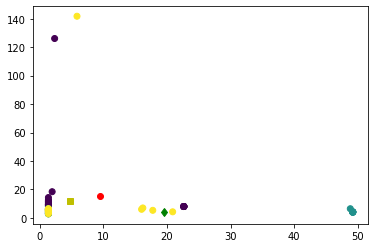

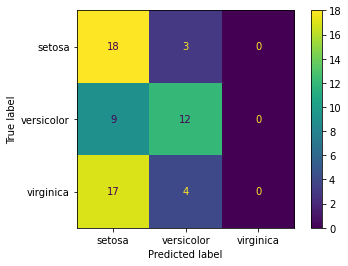

In [ ]:
X = dataSismo[:,1:5]
t = np.array(Tags)
pC1 = np.sum(np.where(t == 0, 1., 0.)) / len(t)
pC2 = np.sum(np.where(t == 1, 1., 0.)) / len(t)
pC3 = np.sum(np.where(t == 2, 1., 0.)) / len(t)

# Seleccionamos los X de la clase 1
X1 = X[t == 0]
mu_C1 = np.mean(X1,axis = 0)
# Seleccionamos los X de la clase 2
X2 = X[t == 1]
mu_C2 = np.mean(X2,axis = 0)
# Seleccionamos los X de la clase 3
X3 = X[t == 2]
mu_C3 = np.mean(X3,axis = 0)

plt.scatter(X[:,0],X[:,1],c = t)
plt.plot(mu_C1[0],mu_C1[1],'or')
plt.plot(mu_C2[0],mu_C2[1],'dg')
plt.plot(mu_C3[0],mu_C3[1],'sy')

N1 = np.sum(np.where(t == 0, 1., 0.))
MU_1 = np.tile(mu_C1,(np.int(N1),1))
S1 = (1/N1)*((X1-MU_1).T)@(X1-MU_1)


N2 = np.sum(np.where(t == 1, 1., 0.))
MU_2 = np.tile(mu_C2,(np.int(N2),1))
S2 = (1/N2)*((X2-MU_2).T)@(X2-MU_2)

N3 = np.sum(np.where(t == 2, 1., 0.))
MU_3 = np.tile(mu_C3,(np.int(N3),1))
S3 = (1/N3)*((X3-MU_3).T)@(X3-MU_3)

N = N1 + N2 + N3
Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

invSigma = np.linalg.inv(Sigma)
w_C1 = invSigma@mu_C1
w_10 = -0.5*((mu_C1).T)@(invSigma@mu_C1) + np.log(pC1)

w_C2 = invSigma@mu_C2
w_20 = -0.5*((mu_C2).T)@(invSigma@mu_C2) + np.log(pC2)

w_C3 = invSigma@mu_C3
w_30 = -0.5*((mu_C3).T)@(invSigma@mu_C3) + np.log(pC3)

# Para las activaciones

A1 = (X@w_C1 + w_10).reshape(np.int(N),1)
A2 = (X@w_C2 + w_20).reshape(np.int(N),1)
A3 = (X@w_C1 + w_30).reshape(np.int(N),1)

A = np.concatenate((A1,A2,A3),axis = 1)

expA = np.exp(A)
aux = np.sum(expA,axis = 1).reshape(int(N),1)
auxM = np.tile(aux,(1,3))

p_Ck_dado_X =  expA/auxM # Posterior: y_Est

print(p_Ck_dado_X[:10])
# print(np.sum(p_Ck_dado_X,axis = 1))
t_Est = np.argmax(p_Ck_dado_X, axis = 1)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Acc = accuracy_score(t,t_Est)
cMat = confusion_matrix(t,t_Est)

print('Accuracy: ',Acc)

ax = ConfusionMatrixDisplay(cMat, display_labels = ['setosa','versicolor','virginica'])
ax.plot()
plt.show()